# GDP ANALYSIS: VARIABLE COTRIBUTION AND ACCURANCY CHECKING
Using data(1980-2021)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
from scipy import stats 
import pandas as pd 
import math
import warnings
warnings.filterwarnings('ignore')

# Import data Frame

In [27]:
df=pd.read_csv("GDP_data.csv")
df.rename(columns={'Time':'Year'},inplace=True)
df.tail()

,Year,Exports,FCE,GDP,G_F_C_E,D_Savings,G_Savings,Imports,Inflation,Remittances,U Rate,Reserve,Industry
39,2019,13.09,73.12,7.88,6.24,26.88,36.35,18.48,3.66,5.23,NaN,52.38,32.85
40,2020,10.44,72.92,3.45,5.97,27.08,37.19,15.83,3.84,5.82,NaN,58.73,32.91
41,2021,10.66,74.66,6.94,5.88,25.34,36.05,17.06,4.12,5.33,NaN,50.49,33.32
42,2022,12.88,74.78,7.10,5.70,25.22,33.96,20.90,5.05,4.67,5.247,NaN,33.92
43,2023,13.16,74.24,5.78,5.67,25.76,34.90,17.83,6.90,5.26,NaN,NaN,34.59


In [28]:

df.shape
# df["FDIO"].fillna(0,inplace=True)
# G_F_C_E fill null by the mean

x=df["G_F_C_E"].mean()
df["G_F_C_E"].fillna(x,inplace=True)
## G_Savings null values replace by their mean
x=df["G_Savings"].mean()
df["G_Savings"].fillna(x,inplace=True)
x=df["Remittances"].min()
df["Remittances"].fillna(x,inplace=True)

#Reserve	replace null value by mean value
x=df["Reserve"].mean()
df["Reserve"].fillna(x,inplace=True)
#Stocks null value replace by mean value
x=df["U Rate"].median()
df["U Rate"].fillna(x,inplace=True)
#Foregin direct investment inflow
# df["FDII"].fillna(0,inplace=True)

df.head(5)

,Year,Exports,FCE,GDP,G_F_C_E,D_Savings,G_Savings,Imports,Inflation,Remittances,U Rate,Reserve,Industry
0,1980,5.49,97.95,0.82,6.14,2.05,8.33,17.88,17.56,1.87,3.485,8.71,20.12
1,1981,5.13,85.16,7.23,4.39,14.84,21.14,14.12,9.89,1.88,3.485,3.79,19.81
2,1982,5.08,85.22,2.13,4.43,14.78,23.53,15.53,9.86,2.84,3.485,4.22,20.04
3,1983,5.60,87.95,3.88,4.31,12.05,23.10,14.71,8.49,3.65,3.485,10.21,20.87
4,1984,3.40,93.22,4.80,4.34,6.78,16.29,13.42,7.88,2.65,2.040,7.36,21.43


In [30]:
df.isnull().sum()

Year           0
Exports        0
FCE            0
GDP            0
G_F_C_E        0
D_Savings      0
G_Savings      0
Imports        0
Inflation      0
Remittances    0
U Rate         0
Reserve        0
Industry       0
dtype: int64

# Correlation Matrix

In [31]:
a=min(df.GDP)
b=max(df.GDP)
print(a,b)
df = round(df,2)
df
df.columns
df.tail(3)

0.82 7.88


,Year,Exports,FCE,GDP,G_F_C_E,D_Savings,G_Savings,Imports,Inflation,Remittances,U Rate,Reserve,Industry
41,2021,10.66,74.66,6.94,5.88,25.34,36.05,17.06,4.12,5.33,3.48,50.49,33.32
42,2022,12.88,74.78,7.10,5.70,25.22,33.96,20.90,5.05,4.67,5.25,25.06,33.92
43,2023,13.16,74.24,5.78,5.67,25.76,34.90,17.83,6.90,5.26,3.48,25.06,34.59


In [32]:
data=df.drop('Year',axis=1)
df_norm=(data-data.min())/(data.max()-data.min())
# df=pd.concat(df_norm)
df_norm.head()


,Exports,FCE,GDP,G_F_C_E,D_Savings,G_Savings,Imports,Inflation,Remittances,U Rate,Reserve,Industry
0,0.124702,1.000000,0.000000,0.954751,0.000000,0.000000,0.380308,0.628386,0.000000,0.591224,0.066576,0.034690
1,0.103222,0.492863,0.907932,0.162896,0.507137,0.396963,0.148923,0.351390,0.001147,0.591224,0.000000,0.014009
2,0.100239,0.495242,0.185552,0.180995,0.504758,0.471026,0.235692,0.350307,0.111239,0.591224,0.005819,0.029353
3,0.131265,0.603489,0.433428,0.126697,0.396511,0.457701,0.185231,0.300831,0.204128,0.591224,0.086874,0.084723
4,0.000000,0.812450,0.563739,0.140271,0.187550,0.246669,0.105846,0.278801,0.089450,0.258661,0.048309,0.122081


# Min-Max scaling

In [33]:

data=df.drop('Year',axis=1)
df_norm=(data-data.min())/(data.max()-data.min())
# df=pd.concat(df_norm)
df_norm.head()



,Exports,FCE,GDP,G_F_C_E,D_Savings,G_Savings,Imports,Inflation,Remittances,U Rate,Reserve,Industry
0,0.124702,1.000000,0.000000,0.954751,0.000000,0.000000,0.380308,0.628386,0.000000,0.591224,0.066576,0.034690
1,0.103222,0.492863,0.907932,0.162896,0.507137,0.396963,0.148923,0.351390,0.001147,0.591224,0.000000,0.014009
2,0.100239,0.495242,0.185552,0.180995,0.504758,0.471026,0.235692,0.350307,0.111239,0.591224,0.005819,0.029353
3,0.131265,0.603489,0.433428,0.126697,0.396511,0.457701,0.185231,0.300831,0.204128,0.591224,0.086874,0.084723
4,0.000000,0.812450,0.563739,0.140271,0.187550,0.246669,0.105846,0.278801,0.089450,0.258661,0.048309,0.122081


In [34]:
x2=df.Year
df=pd.concat([x2,df_norm],axis=1)
df.head()

,Year,Exports,FCE,GDP,G_F_C_E,D_Savings,G_Savings,Imports,Inflation,Remittances,U Rate,Reserve,Industry
0,1980,0.124702,1.000000,0.000000,0.954751,0.000000,0.000000,0.380308,0.628386,0.000000,0.591224,0.066576,0.034690
1,1981,0.103222,0.492863,0.907932,0.162896,0.507137,0.396963,0.148923,0.351390,0.001147,0.591224,0.000000,0.014009
2,1982,0.100239,0.495242,0.185552,0.180995,0.504758,0.471026,0.235692,0.350307,0.111239,0.591224,0.005819,0.029353
3,1983,0.131265,0.603489,0.433428,0.126697,0.396511,0.457701,0.185231,0.300831,0.204128,0.591224,0.086874,0.084723
4,1984,0.000000,0.812450,0.563739,0.140271,0.187550,0.246669,0.105846,0.278801,0.089450,0.258661,0.048309,0.122081


In [35]:
x2.shape

(44,)

In [36]:
df_norm.shape

(44, 12)

In [37]:
df.to_csv("cleanned_data12.csv")

# Import clean data frame

In [38]:
df=pd.read_csv("cleanned_data12.csv")
df.head(10)



,Unnamed: 0,Year,Exports,FCE,GDP,G_F_C_E,D_Savings,G_Savings,Imports,Inflation,Remittances,U Rate,Reserve,Industry
0,0,1980,0.124702,1.000000,0.000000,0.954751,0.000000,0.000000,0.380308,0.628386,0.000000,0.591224,0.066576,0.034690
1,1,1981,0.103222,0.492863,0.907932,0.162896,0.507137,0.396963,0.148923,0.351390,0.001147,0.591224,0.000000,0.014009
2,2,1982,0.100239,0.495242,0.185552,0.180995,0.504758,0.471026,0.235692,0.350307,0.111239,0.591224,0.005819,0.029353
3,3,1983,0.131265,0.603489,0.433428,0.126697,0.396511,0.457701,0.185231,0.300831,0.204128,0.591224,0.086874,0.084723
4,4,1984,0.000000,0.812450,0.563739,0.140271,0.187550,0.246669,0.105846,0.278801,0.089450,0.258661,0.048309,0.122081
5,5,1985,0.118138,0.505948,0.356941,0.000000,0.494052,0.408739,0.070154,0.662333,0.044725,0.254042,0.022463,0.048032
6,6,1986,0.106205,0.478192,0.474504,0.076923,0.521808,0.447784,0.008615,0.292163,0.089450,0.009238,0.023004,0.052035
7,7,1987,0.094869,0.522205,0.417847,0.049774,0.477795,0.443136,0.000000,0.395811,0.138761,0.591224,0.070501,0.000000
8,8,1988,0.121122,0.534893,0.226629,0.063348,0.465107,0.429811,0.033846,0.265078,0.114679,0.591224,0.090528,0.022682
9,9,1989,0.127685,0.475416,0.286119,0.054299,0.524584,0.434459,0.067077,0.295414,0.087156,0.000000,0.015968,0.012675


In [39]:
list(df.columns)
df=df.drop(['Unnamed: 0','Year'],axis=1)
df

,Exports,FCE,GDP,G_F_C_E,D_Savings,G_Savings,Imports,Inflation,Remittances,U Rate,Reserve,Industry
0,0.124702,1.000000,0.000000,0.954751,0.000000,0.000000,0.380308,0.628386,0.000000,0.591224,0.066576,0.034690
1,0.103222,0.492863,0.907932,0.162896,0.507137,0.396963,0.148923,0.351390,0.001147,0.591224,0.000000,0.014009
2,0.100239,0.495242,0.185552,0.180995,0.504758,0.471026,0.235692,0.350307,0.111239,0.591224,0.005819,0.029353
3,0.131265,0.603489,0.433428,0.126697,0.396511,0.457701,0.185231,0.300831,0.204128,0.591224,0.086874,0.084723
4,0.000000,0.812450,0.563739,0.140271,0.187550,0.246669,0.105846,0.278801,0.089450,0.258661,0.048309,0.122081
5,0.118138,0.505948,0.356941,0.000000,0.494052,0.408739,0.070154,0.662333,0.044725,0.254042,0.022463,0.048032
6,0.106205,0.478192,0.474504,0.076923,0.521808,0.447784,0.008615,0.292163,0.089450,0.009238,0.023004,0.052035
7,0.094869,0.522205,0.417847,0.049774,0.477795,0.443136,0.000000,0.395811,0.138761,0.591224,0.070501,0.000000
8,0.121122,0.534893,0.226629,0.063348,0.465107,0.429811,0.033846,0.265078,0.114679,0.591224,0.090528,0.022682
9,0.127685,0.475416,0.286119,0.054299,0.524584,0.434459,0.067077,0.295414,0.087156,0.000000,0.015968,0.012675


In [40]:
cor=df.corr()
cor

,Exports,FCE,GDP,G_F_C_E,D_Savings,G_Savings,Imports,Inflation,Remittances,U Rate,Reserve,Industry
Exports,1.000000,-0.654233,0.623701,0.553214,0.654233,0.865965,0.924515,-0.158305,0.900449,0.496454,0.630651,0.493567
FCE,-0.654233,1.000000,-0.682842,-0.625091,-1.000000,-0.882950,-0.466353,0.161752,-0.536119,-0.430019,-0.700148,-0.801998
GDP,0.623701,-0.682842,1.000000,0.457172,0.682842,0.684892,0.529477,-0.157212,0.497655,0.404664,0.547619,0.594235
G_F_C_E,0.553214,-0.625091,0.457172,1.000000,0.625091,0.564212,0.502191,-0.033598,0.413217,0.524734,0.691268,0.807615
D_Savings,0.654233,-1.000000,0.682842,0.625091,1.000000,0.882950,0.466353,-0.161752,0.536119,0.430019,0.700148,0.801998
G_Savings,0.865965,-0.882950,0.684892,0.564212,0.882950,1.000000,0.756160,-0.158884,0.863688,0.470702,0.754325,0.693916
Imports,0.924515,-0.466353,0.529477,0.502191,0.466353,0.756160,1.000000,-0.043017,0.897840,0.449748,0.576911,0.405664
Inflation,-0.158305,0.161752,-0.157212,-0.033598,-0.161752,-0.158884,-0.043017,1.000000,-0.117893,-0.112153,0.074267,-0.096550
Remittances,0.900449,-0.536119,0.497655,0.413217,0.536119,0.863688,0.897840,-0.117893,1.000000,0.411571,0.603095,0.400587
U Rate,0.496454,-0.430019,0.404664,0.524734,0.430019,0.470702,0.449748,-0.112153,0.411571,1.000000,0.408782,0.444117


# Heatmap

<Axes: >

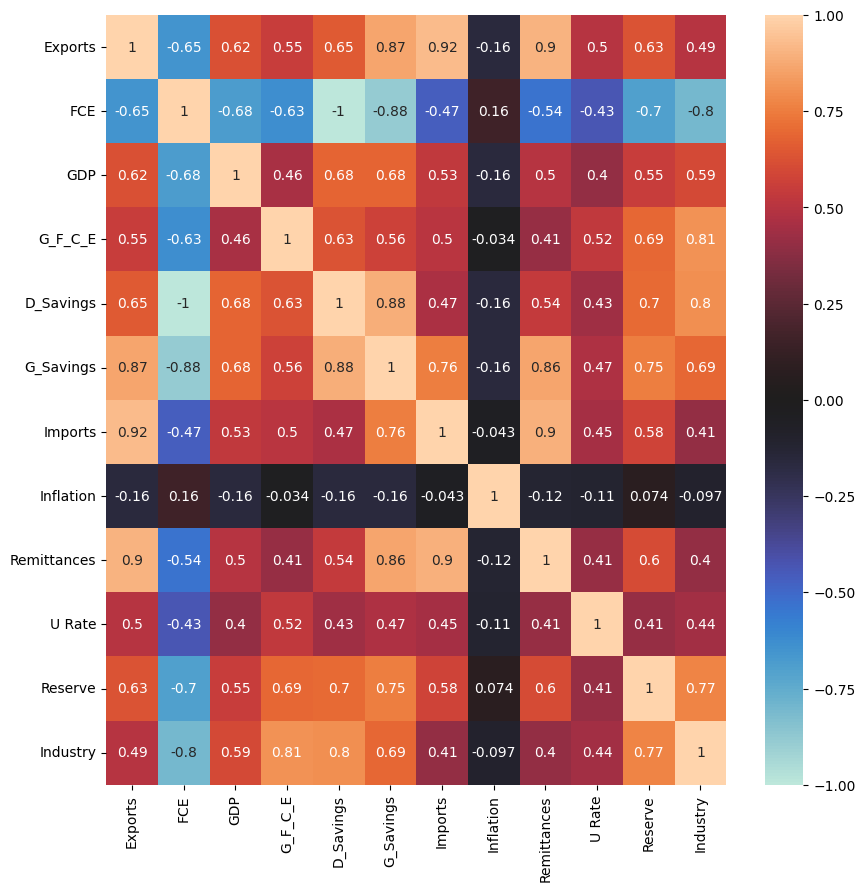

In [41]:
#Heatmap
plt.figure(figsize=(10,10))            
annot=True
hemap=sns.heatmap(cor,vmin=-1,vmax=1,center=0,annot=annot)
hemap
#plt.savefig("HeadMap")


# Upper trangular matrix

In [42]:
mask = np.triu(np.ones_like(df.corr()))
 

<function matplotlib.pyplot.show(close=None, block=None)>

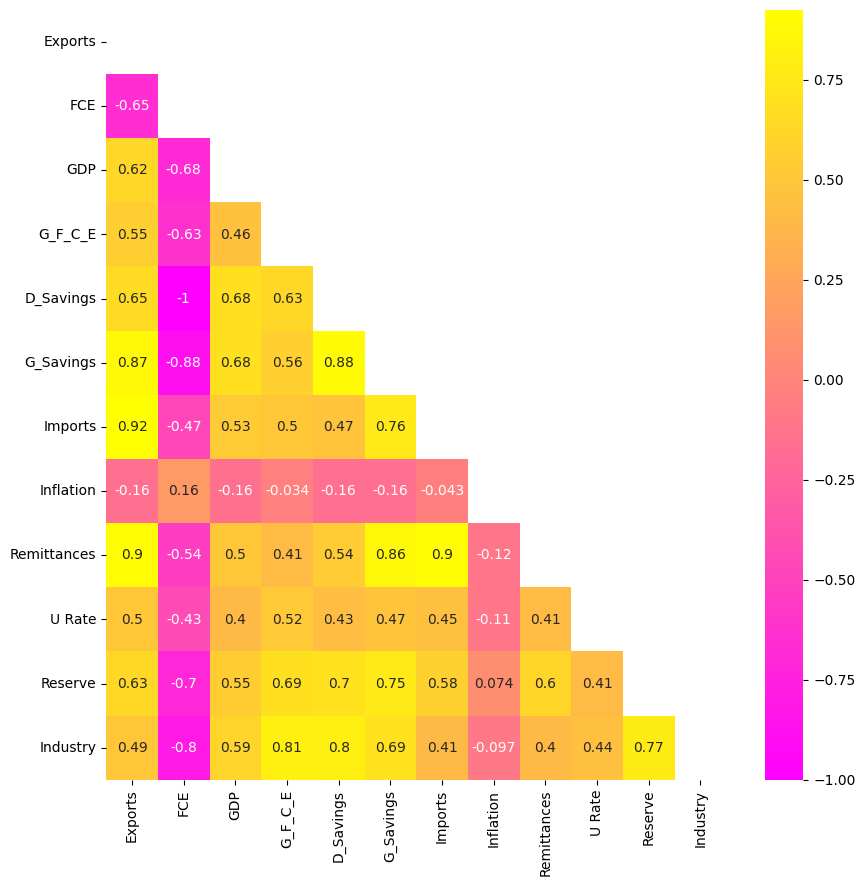

In [43]:
#upper trangular correlation matrix
plt.figure(figsize=(10,10))
dataplot = sns.heatmap(df.corr(), mask=mask,cmap="spring",annot=True)
plt.show
#plt.savefig("upper_trangular_matrix.png")

# Multiple Linear Regrssion

In [44]:
df=pd.concat([x2,df],axis=1)

x=df.drop("GDP",axis=1)
x1=df.Year

y=df.GDP
x.shape,x1.shape,y.shape

((44, 12), (44,), (44,))

In [45]:
x.columns

Index(['Year', 'Exports', 'FCE', 'G_F_C_E', 'D_Savings', 'G_Savings',
       'Imports', 'Inflation', 'Remittances', 'U Rate', 'Reserve', 'Industry'],
      dtype='object')

In [46]:
X = df.drop("GDP",axis=1)
y = df.GDP
y

0     0.000000
1     0.907932
2     0.185552
3     0.433428
4     0.563739
5     0.356941
6     0.474504
7     0.417847
8     0.226629
9     0.286119
10    0.679887
11    0.378187
12    0.654391
13    0.550992
14    0.434844
15    0.609065
16    0.524079
17    0.519830
18    0.617564
19    0.545326
20    0.633144
21    0.603399
22    0.426346
23    0.555241
24    0.626062
25    0.810198
26    0.828612
27    0.883853
28    0.735127
29    0.599150
30    0.672805
31    0.798867
32    0.807365
33    0.735127
34    0.742210
35    0.811615
36    0.890935
37    0.817280
38    0.920680
39    1.000000
40    0.372521
41    0.866856
42    0.889518
43    0.702550
Name: GDP, dtype: float64

In [48]:
X.columns
x=x.drop('Year',axis=1)


In [49]:
X.shape,y.shape
print(x.columns)

Index(['Exports', 'FCE', 'G_F_C_E', 'D_Savings', 'G_Savings', 'Imports',
       'Inflation', 'Remittances', 'U Rate', 'Reserve', 'Industry'],
      dtype='object')


In [54]:
from sklearn import model_selection 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.metrics import r2_score,mean_squared_error,root_mean_squared_error,mean_absolute_error,median_absolute_error,mean_absolute_percentage_error

In [56]:

xtrain,xtest,ytrain,ytest=model_selection.train_test_split(x,y,test_size=0.2,random_state=17)

In [57]:
lm=LinearRegression()
lm.fit(x,y)
print(lm.intercept_)
print(lm.coef_)

-0.7822391053275124
[ 4.24019247e-01  7.61369705e-01 -2.03586059e-03 -7.61369705e-01
  2.97008383e+00  2.23690879e-01 -3.43911076e-02 -1.66189678e+00
  4.12559656e-02 -8.66070957e-02  1.19224974e-01]


In [58]:
lm_train_score=lm.score(xtrain,ytrain)
lm_test_score=lm.score(xtest,ytest)
print("train score:{}".format(lm_train_score))
print("test score:{}".format(lm_test_score))



train score:0.5978433949139226
test score:0.5870606396670635


In [59]:
y_prediction=lm.predict(xtest)
r2_score(ytest,y_prediction)

0.5870606396670635

In [60]:
print("Root Mean squared error for train data:{}".format(sqrt(mean_squared_error(ytrain,lm.predict(xtrain)))))
print("Mean absulate error for train data:{}".format(mean_absolute_error(ytrain,lm.predict(xtrain))))
print("Median absulate error for train data:{}".format(median_absolute_error(ytrain,lm.predict(xtrain))))


Root Mean squared error for train data:0.14245188409847526
Mean absulate error for train data:0.10563247879794717
Median absulate error for train data:0.07476484895300883


In [61]:
# Prediction next five year GDP
y=y_prediction[:5]
print('Prediction next five year GDP:{}'.format(y))

Prediction next five year GDP:[0.66575667 0.63693802 0.51815697 0.53791658 0.65786019]


In [62]:
import numpy
print(a,b)
for i in y:
    GDP=i*(b-a)+a
    print(round(GDP,2))
    


0.82 7.88
5.52
5.32
4.48
4.62
5.46


In [63]:
# prediction from multiple linear regression


# Hyperparameter Tuning Ridge regression model

In [64]:
from sklearn.linear_model import Ridge
from math import sqrt
from sklearn.metrics import r2_score,mean_squared_error,root_mean_squared_error,mean_absolute_error,median_absolute_error
from sklearn.model_selection import GridSearchCV


In [65]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score


RidgeRegression = Ridge()
Parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridgeRegressor = GridSearchCV(RidgeRegression,Parameters, cv=5)
ridgeRegressor.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]})

In [66]:
print(ridgeRegressor.best_estimator_)

Ridge(alpha=5)


In [67]:
model_2=Ridge(alpha=5)
model_2.fit(xtrain,ytrain)

Ridge(alpha=5)

In [68]:
train_score=model_2.score(xtrain,ytrain)
test_score=model_2.score(xtest,ytest)
print(train_score,test_score)

0.5161855842147772 0.28956212976641615


In [69]:
y_pred_2=model_2.predict(xtest)

In [70]:
r2_score(ytest,y_pred_2)

0.28956212976641615

In [71]:
y_pred_2[:5]

array([0.78067666, 0.59489343, 0.50319625, 0.62576511, 0.59736774])

In [72]:
print("Mean squared error for train data:{}".format(sqrt(mean_squared_error(ytrain,model_2.predict(xtrain)))))
print("Mean absulate error for train data:{}".format(mean_absolute_error(ytrain,model_2.predict(xtrain))))
print("Median absulate error for train data:{}".format(median_absolute_error(ytrain,model_2.predict(xtrain))))



Mean squared error for train data:0.15624639178579394
Mean absulate error for train data:0.11589585280528551
Median absulate error for train data:0.10096147097146618


In [73]:
# Prediction next five year GDP
y_ridge=y_pred_2[:5]
print('Prediction next five year GDP:{}'.format(y_ridge))

Prediction next five year GDP:[0.78067666 0.59489343 0.50319625 0.62576511 0.59736774]


In [74]:
print(a,b)
for i in y_ridge:
    GDP=i*(b-a)+a
    print(round(GDP,2))


0.82 7.88
6.33
5.02
4.37
5.24
5.04


# HyperParameter Tuning for lasso regression

In [75]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV


In [76]:
lasso_params = {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03,0.05,0.06,0.07,0.08,1,2,3],
               'selection':['cyclic', 'random']
               }
lasso_model=GridSearchCV(Lasso(),lasso_params)
lasso_model.fit(xtrain,ytrain)
print(lasso_model.best_estimator_)

Lasso(alpha=0.02, selection='random')


In [77]:
lasso_model_2=Lasso(alpha=0.2,selection='random')
lasso_model_2.fit(xtrain,ytrain)

Lasso(alpha=0.2, selection='random')

In [78]:
train_score=lasso_model_2.score(xtrain,ytrain)

test_score=lasso_model_2.score(xtest,ytest)
print(train_score)
print(test_score)


0.0
-0.0336670268989272


In [79]:
y_pred=lasso_model_2.predict(xtest)
r2_score(ytest,y_pred)

-0.0336670268989272

In [80]:
# Next five year prediction
y1=y_pred[:5]

In [81]:
print(a,b)
for i in y1:
    GDP=i*(b-a)+a
    print(round(GDP,2))

0.82 7.88
5.12
5.12
5.12
5.12
5.12


# Hyperparameter Tuning for SV Regression

In [82]:
from sklearn.svm import SVR

from sklearn.model_selection import GridSearchCV 

param_grid = {'C': [0.1, 1, 10, 100, 1000], 
			'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
			'kernel': ['rbf']} 

grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3) 
sv_model=grid.fit(xtrain, ytrain) 



Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.420 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.077 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.508 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.134 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.484 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.313 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.120 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.417 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.024 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.449 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.027 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

In [83]:
print(sv_model.best_estimator_)

SVR(C=100, gamma=0.0001)


In [84]:
sv_model_2=SVR(C=100,gamma=0.001,kernel='rbf',)
sv_model_2.fit(xtrain,ytrain)

SVR(C=100, gamma=0.001)

In [85]:
y_pred_sv=sv_model_2.predict(xtest)
r2_score(ytest,y_pred_sv)


-0.01124355202957239

In [86]:
sv_train_score=sv_model_2.score(xtrain,ytrain)
sv_test_score=sv_model_2.score(xtest,ytest)
print("train score:{}".format(sv_train_score))
print("test score:{}".format(sv_test_score))


train score:0.5904594276239803
test score:-0.01124355202957239


In [87]:
print("Mean squared error for train data:{}".format(sqrt(mean_squared_error(ytrain,sv_model_2.predict(xtrain)))))
print("Mean absulate error for train data:{}".format(mean_absolute_error(ytrain,sv_model_2.predict(xtrain))))
print("Median absulate error for train data:{}".format(median_absolute_error(ytrain,sv_model_2.predict(xtrain))))



Mean squared error for train data:0.14375370978288118
Mean absulate error for train data:0.10551768649221818
Median absulate error for train data:0.07756368551585624


In [88]:
# Next five year prediction
y2=y_pred_sv[:5]

In [89]:
print(a,b)
for i in y2:
    GDP=i*(b-a)+a
    print(round(GDP,2))

0.82 7.88
7.13
5.14
4.39
5.37
5.17


# Hyperparameter Tuning for Random forest

In [90]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [91]:
param_grid = { 
	'n_estimators': [25, 50, 100, 150], 
	'max_features': ['sqrt', 'log2', None], 
	'max_depth': [3, 6, 9,10,15,25,30], 
	'max_leaf_nodes': [3, 6, 9], 
} 


In [92]:
# from sklearn.metrics import 
random_search =GridSearchCV(RandomForestRegressor(),param_grid) 
random_search.fit(xtrain, ytrain) 
print(random_search.best_estimator_) 


RandomForestRegressor(max_depth=3, max_features='log2', max_leaf_nodes=3,
                      n_estimators=25)


In [94]:
model_rand=RandomForestRegressor(max_depth=6,
                                 max_features='log2',
                                 max_leaf_nodes=3,
                                 n_estimators=25
                            
                                 )
model_rand.fit(xtrain, ytrain) 
y_pred_rand = model_rand.predict(xtest)
r2_score(ytest,y_pred_rand)

0.33157185217536445

In [95]:
train_score=model_rand.score(xtrain,ytrain)
test_score=model_rand.score(xtest,ytest)
print("train score:{}".format(train_score))
print("test score:{}".format(test_score))



train score:0.66015472816235
test score:0.33157185217536445


In [96]:
print("Root Mean squared error for train data:{}".format(sqrt(mean_squared_error(ytrain, model_rand.predict(xtrain)))))
print("Mean absulate error for train data:{}".format(mean_absolute_error(ytrain,model_rand.predict(xtrain))))
print("Median absulate error for train data:{}".format(median_absolute_error(ytrain,model_rand.predict(xtrain))))



Root Mean squared error for train data:0.1309517210952523
Mean absulate error for train data:0.0984189251946914
Median absulate error for train data:0.07232691630250154


In [97]:
# Next five GDP prediction
y3=y_pred_rand[:5]

In [98]:
print(a,b)
for i in y3:
    GDP=i*(b-a)+a
    print(round(GDP,2))

0.82 7.88
6.32
4.84
4.19
5.27
4.77


# Hyperparameter tuning of GradientBoostRegressor

In [99]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [100]:
para_grid={
    'n_estimators': [ 100, 200, 300, 400,500, 600, 700, 800, 900, 1000,1100, 1200],
    'min_samples_split': [2,4,8],
    'learning_rate': [0.01,0.1,1],
    'max_features': [ 'auto', 'sqrt', 'log2'],
    'max_depth': [5, 10, 15, 20, 25, 30]
}


In [101]:
gb_model = GridSearchCV(GradientBoostingRegressor(),para_grid,cv=5)
gb_model.fit(xtrain,ytrain)
print(gb_model.best_estimator_)

GradientBoostingRegressor(learning_rate=1, max_depth=5, max_features='sqrt',
                          n_estimators=900)


In [104]:
gb_model_2=GradientBoostingRegressor(
                                    learning_rate=1,
                                     max_depth=5,
                                     max_features='sqrt',
                                     
                                    n_estimators=900
                                     
                                     
                               )
gb_model_2.fit(xtrain,ytrain)
y_gb_pred=gb_model_2.predict(xtest)
r2_score(ytest,y_gb_pred)

0.32224015385767313

In [105]:
train_score=gb_model_2.score(xtrain,ytrain)
test_score=gb_model_2.score(xtest,ytest)
print("train_score:{:.2f}".format(train_score))
print("train_score:{:.2f}".format(test_score))


train_score:1.00
train_score:0.32


In [106]:
print("Root Mean squared error for train data:{}".format(sqrt(mean_squared_error(ytrain, gb_model_2.predict(xtrain)))))

print("Mean absoulute error for test data:{}".format(sqrt(mean_absolute_error(ytrain, gb_model_2.predict(xtrain)))))
print("Median absulate error for train data:{}".format(median_absolute_error(ytrain,gb_model_2.predict(xtrain))))


Root Mean squared error for train data:0.0
Mean absoulute error for test data:0.0
Median absulate error for train data:0.0


In [107]:
# Next five GDP prediction
y4=y_gb_pred[:5]

In [108]:
print(a,b)
for i in y4:
    GDP=i*(b-a)+a
    print(GDP)

0.82 7.88
5.281777777777778
5.167696421000125
5.56643384461903
5.13176835016835
5.039777777777778


# Hyperparameter tuning for adaboost regression.

In [109]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

param_dist = {
 'n_estimators': [50, 100,150,200,500],
 'learning_rate' : [0.01,0.05,0.1,0.3,1],
 'loss' : ['linear', 'square', 'exponential']
 }


In [110]:
rand_search = GridSearchCV(AdaBoostRegressor(),param_dist,cv=5)
rand_search.fit(xtrain,ytrain)
print(rand_search.best_estimator_)


AdaBoostRegressor(learning_rate=0.01)


In [111]:
random_model=AdaBoostRegressor(learning_rate=0.01,
                               
                               
                            
                              )
random_model.fit(xtrain,ytrain)
y_rand_pred=random_model.predict(xtest)
r2_score(ytest,y_rand_pred)

0.12512128491043484

In [95]:
train_score=random_model.score(xtrain,ytrain)
test_score=random_model.score(xtest,ytest)
print("train_score:{:.2f}".format(train_score))
print("train_score:{:.2f}".format(test_score))



train_score:0.94
train_score:0.81


In [112]:
print("Root Mean squared error for train data:{}".format(sqrt(mean_squared_error(ytrain, random_model.predict(xtrain)))))
print("Mean absolute error for test data:{}".format((mean_absolute_error(ytrain, random_model.predict(xtrain)))))
print("Median absulate error for train data:{}".format(median_absolute_error(ytrain,random_model.predict(xtrain))))


Root Mean squared error for train data:0.06534594880537273
Mean absolute error for test data:0.04505879002287337
Median absulate error for train data:0.030594900849858386


In [113]:
y5=y_rand_pred[:5]

In [114]:
print(a,b)
for i in y5:
    GDP=i*(b-a)+a
    print(GDP)

0.82 7.88
7.02
5.045
3.89
5.088
4.884285714285715
